## Introduction

Data visualization is as much about the art of reaching the content consumers, as about the science of deriving statistical insights from data. The intent of this chapter is to acquire the practical knowledge of the strengths and limitations of various visualization techniques, such that you can easily balance this science and art. Combining this skill with the techniques learnt in the first chapter of this courseware will help you make stellar plots that are both meaningful and attractive.

## Learning outcomes

This chapter is a primer on the different types of visualization and the contexts in which they are most effective. Using seaborn, you will learn to create a variety of plots and become proficient in selecting the right kind of visualization for the most suitable representation of your data.
- <b>Learn to create plots that present global patterns in data</b>: histograms; scatter plots; hexbin plots; contour plots; line plots; heatmaps.
- <b>Learn to create plots that present summary statistics of your data</b> histograms revisited; box plots and violin plots.

## Creating plots that present global patterns in data

In this section, we will study plots that present the global patterns in data -- i.e. plots which show the variance in individual features in the data, as well as how different features present in data vary with respect to each other. 

Let’s start with a single feature. Consider the example of the 'mpg' dataset from seaborn. Here's what the dataset looks like:

In [3]:
import seaborn as sns

# load a seaborn dataset
mpg_df = sns.load_dataset("mpg")
print(mpg_df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


Fun fact: The dataset was originally used to study the relationship of mileage -- Miles Per Gallon (MPG) -- with different features in the dataset. Hence the name, mpg!

### Histograms

The first type of plot we are going to generate is called a histogram.

<div class="alert-info">
    <b>What is a histogram?</b>: A histogram of a feature is a plot with the range of the feature on the x-axis, and the count of data points whose the feature in the corresponding range on the y-axis. 
</div>

To generate a histogram of vehicle mileages (mpg), we need to write a simple code like below:

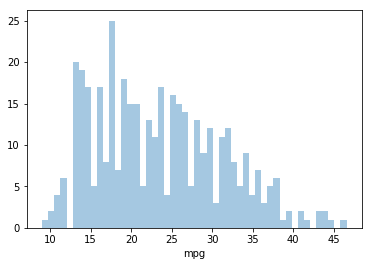

In [4]:
# import necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt

# histogram using seaborn
ax = sns.distplot(mpg_df.mpg, bins=50,kde=False)

That’s pretty neat. Looking at the histogram, even a naive viewer immediately gets a picture of the distribution of the feature (mileages of the vehicles in our dataset). Specifically, two observations are important in a histogram:
- what values does the feature take more frequently than others, and 
- are there any outliers in the data.

### Scatter plots

The next type of plot we will generate is called a scatter plot.

<div class="alert-info">
    <b>What is a scatter plot?</b>: A scatter plot is a simple plot presenting the values of two features in a dataset. Each datapoint is represented by a point with x-coordinate as the value of the first feature, and y-coordinate as the value of the second feature. 
</div>

Suppose we want to examine the relationship between weight and mileage (mpg) of the vehicles. A scatterplot is a great tool to learn more about two such numerical attributes. We generate a scatterplot as in the code below.

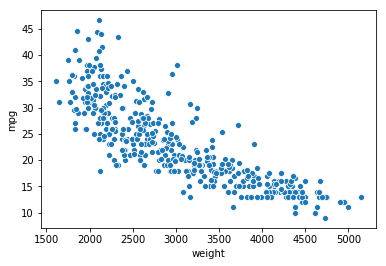

In [5]:
# seaborn 2-D scatter plot 
ax = sns.scatterplot(x="weight", y="mpg", data=mpg_df)

### Hexagonal binning plots

There’s also a fancier version of scatterplots, called hexabin plot -- this can be used when both rows and columns correspond to numerical attributes. This little code can do it for you. 

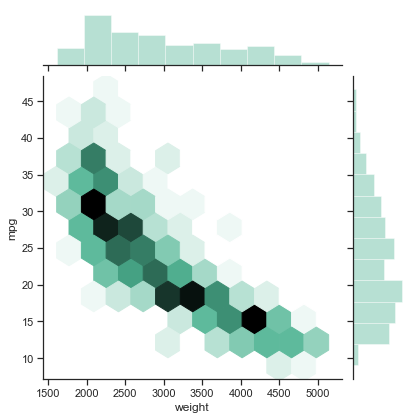

In [13]:
## hexbin plot
sns.set(style="ticks")
sns.jointplot(mpg_df.weight, mpg_df.mpg, kind="hex", color="#4CB391")

<div class="alert-info">
    <b>Interpretation of hexbin plots</b>: The darker bins indicate that there are a larger number of points in the corresponding ranges of features on the x- and y-axis. The lighter bins indicate less points. The white space corresponds to no points.
</div>

As you can see, hexbin plots are quite a nice data visualization tool when the data points are very dense and it's tough to infer much from looking at individual data points as in a scatter plot.

### Contour plots

Another alternative to scatterplots when the datapoints are densely populated in specific region(s), is a contour plot. An example is given below:

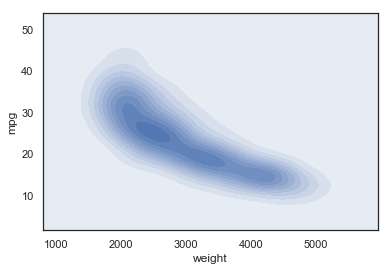

In [20]:
# contour plot
sns.set_style("white")
sns.kdeplot(mpg_df.weight, mpg_df.mpg, shade=True)

<div class="alert-info">
    <b>Interpretation of countour plots</b>: The interpretation of contour plots is similar to hexbin plots -- darker regions indicate more datapoints, and lighter regions indicate less datapoints.
</div>

### Line plots

Before we introduce line plots, let's look at another scatterplot for a different pair of features -- model_year and mpg.

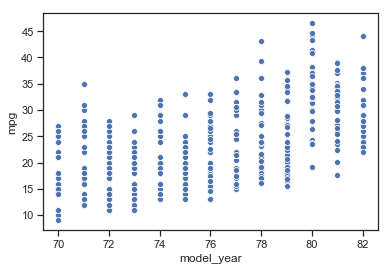

In [14]:
# seaborn 2-D scatter plot 
ax1 = sns.scatterplot(x="model_year", y="mpg", data=mpg_df)

In the above example, we see that the `model_year` feature only takes discrete values between 71 and 82. Now, when we have a numerical feature like this, drawing a line plot is a good idea. We can draw a simple line plot showing the relationship between model_year and mileage (mpg) with the following code:

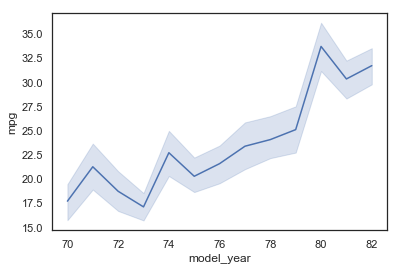

In [59]:
# seaborn line plot code
ax = sns.lineplot(x="model_year", y="mpg", data=mpg_df)

<div class="alert-info">
    <b>Interpretation of line plot</b>: The points connected by the solid line represent the mean of the y-axis feature at the corresponding x-coordinate. The shaded area around the line plot shows the confidence interval for the y-axis feature (by default, seaborn sets this to 95% confidence interval). The parameter 'ci' can be used to change to a different confidence interval.
</div>

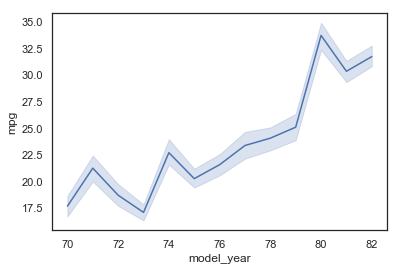

In [60]:
# setting a 68% confidence interval (1 standard deviation around the mean)
ax = sns.lineplot(x="model_year", y="mpg", data=mpg_df, ci=68)

Now consider example of the flights dataset from seaborn.

In [27]:
flights_df = sns.load_dataset("flights")
print(flights_df.head())

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121


Suppose you want to look at how the number of passengers is varying across years in each month. How would you display this information?

One option is to draw multiple line plots in a single figure. For example, let's look at the line plots for the months of December and January across different years. We can do this with the code below.

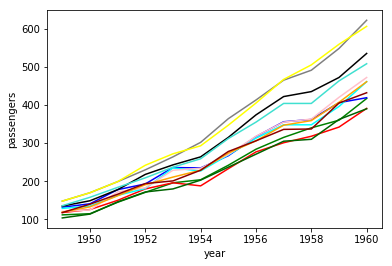

In [7]:
#flights_df = flights_df.pivot("month", "year", "passengers")
#ax = sns.heatmap(flights_df)

# line plots for the planets dataset
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='January'], color='green')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='February'], color='red')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='March'], color='blue')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='April'], color='cyan')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='May'], color='pink')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='June'], color='black')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='July'], color='grey')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='August'], color='yellow')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='September'], color='turquoise')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='October'], color='orange')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='November'], color='darkgreen')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='December'], color='darkred')

With this example of 12 line plots, we can see how a figure with too many line plots quickly begins to get crowded and confusing. Thus, for certain scenarios, line plots are neither appealing nor useful. 

So, what is the alternative for our use case? 

### Heatmaps

Enter heatmaps.

<div class="alert-info">
    <b>What is a heatmap?</b>: A heatmap is a visual representation of a specific continuous numerical feature as a function of two other discrete features (either categorical or discrete numerical) in the dataset. The information in presented in a grid form -- each cell in the grid corresponds to a specific pair of values taken by the two discrete features, and is colored based on the value of the third continuous numerical feature.
</div>

For a concrete example, let us generate a heatmap for our planets with the simple code below:

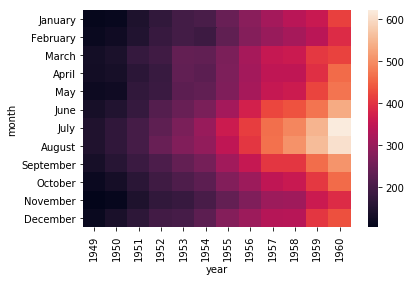

In [22]:
#flights_df.drop_duplicates(['number','year'],inplace=True)

# heatmap code with seaborn
df_pivoted = flights_df.pivot("month", "year", "passengers")
ax = sns.heatmap(df_pivoted)

A heatmap is a great tool to visualize high-dimensional data and even tease out features that are particularly variable across different class. In our example, the months July and August seem to have the largest number of flights (as compared to other months) across the years in observation. Now, that's an interesting trend to find from a simple visualization!

Plotting heatmaps is a very fun thing to explore, and there are lots of options available to tweak with the parameters. You can learn more about them here. [provide reference for heatmaps with seaborn/pandas]. However, we will only mention a few important aspects here -- the clustering option and the distance metric.

Rows or columns in a heatmap can also be clustered based on the extent of their similarity. To do this in seaborn, use the clustermap option like so:

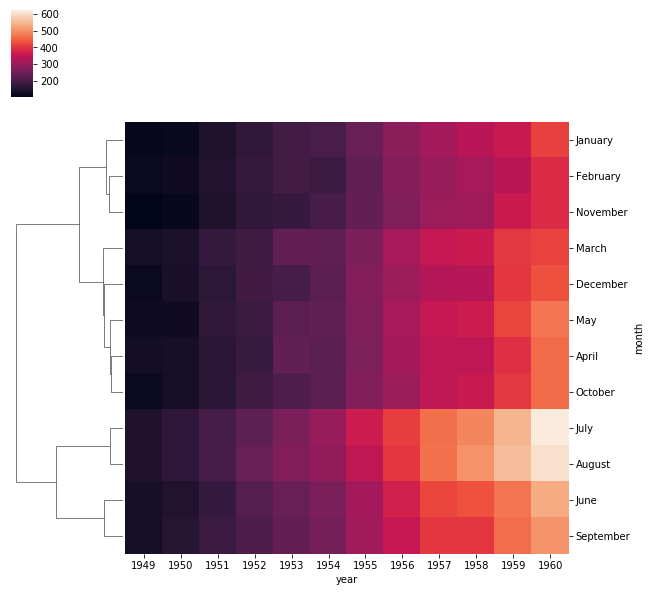

In [24]:
ax = sns.clustermap(df_pivoted, col_cluster=False, row_cluster=True)

Did you notice how the order of months got rearranged in the plots but some months (e.g. July and August) stuck together because of their similar trends? In the above example, we clustered the flight data by month, but we could, of course, cluster the data by year by switching the parameter values (`row_cluster=False, col_cluster=True`) or cluster both by row and column (`row_cluster=True, col_cluster=True`).  

At this point, one may wonder, but wait, how is the similarity between computed? The answer is that it depends on the distance metric -- i.e. how the distance between two rows or two columns is computed. The rows/columns with the least distance are clustered closer together than the ones with larger distance. The user can set the distance metric to one of the many available options ('manhattan', 'euclidean', 'correlation', etc) simply using the `metric` option as below. You can read more about the distance metric options here [reference for distance metric]. Note that seaborn sets the metric to 'euclidean' by default.

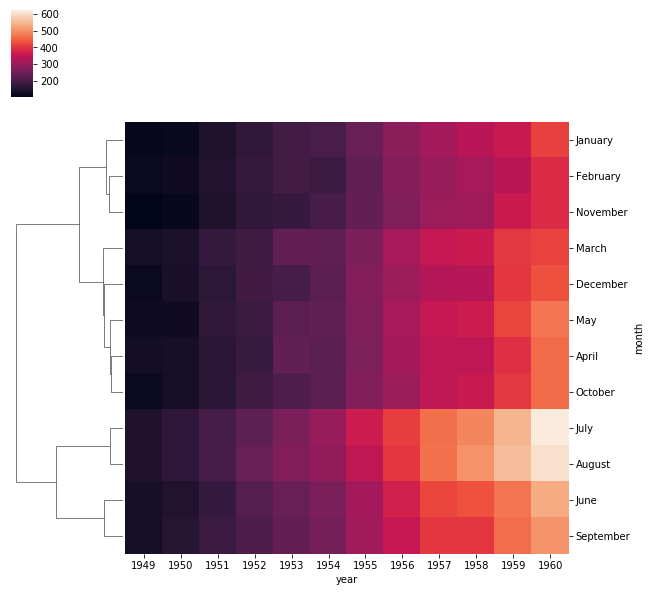

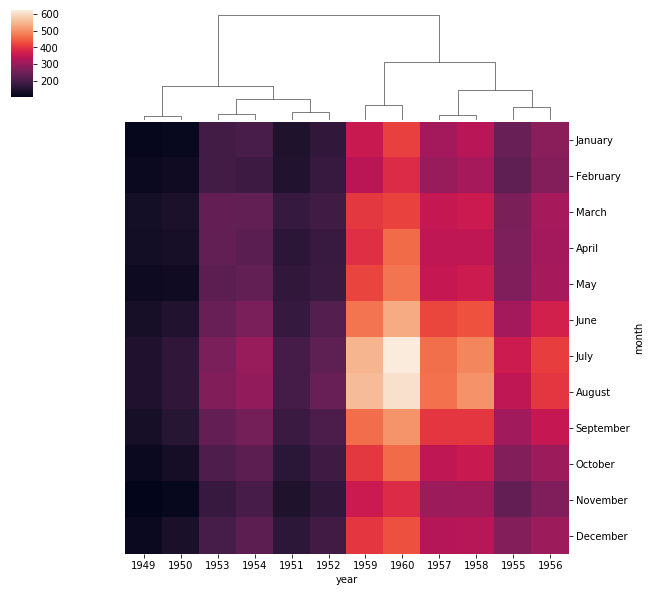

In [23]:
ax = sns.clustermap(df_pivoted, col_cluster=False, metric='euclidean')
ax = sns.clustermap(df_pivoted, row_cluster=False, metric='correlation')

On reading about the distance metric, we learn that it defines the distance between two rows/columns. However, if we look carefully, we see that the heatmap also clusters, not just individual rows or columns, but also groups of rows and columns. This is where linkage comes into picture. But hold your breath for a moment before we come to that!

The clustering seen in heatmaps is called agglomerative hierarchical clustering because it involves sequential grouping of rows/columns until all of them belong to a single cluster, resulting in a hierarchy. Without loss of generality, let's assume we are clustering rows. The first step in hierarchical clustering is to assign each row to a compute the distance between all possible pairs of rows, and select two rows, say A and B, with the least distance. Once these rows are grouped, they are said to be 'merged' into a single cluster. Once this happens, we need a rule that not only determines distance between two rows, but also distance between any two clusters (even if the cluster contains a single point). 
- If we define the distance between two clusters as the distance between the two points across the clusters closest to each other, the rule is called _single linkage_. 
- If the rule is to define distance between two clusters as the distance between the points farthest to each other, it is called _complete linkage_. 
- If the the rule is to define distance as the average of all possible pairs of rows in the two clusters, it is called _average linkage_. 

The same holds for clustering columns too. :) Going back to the code, we can incorporate linkage into the clustermap method by using the parameter `method` as below.




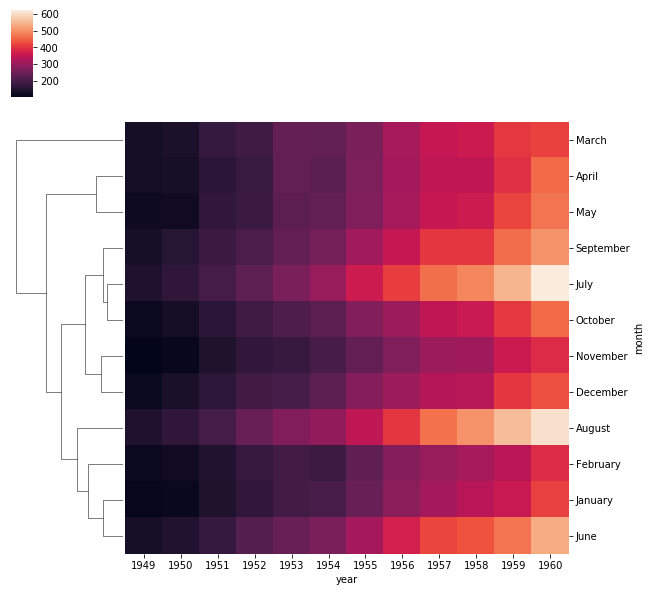

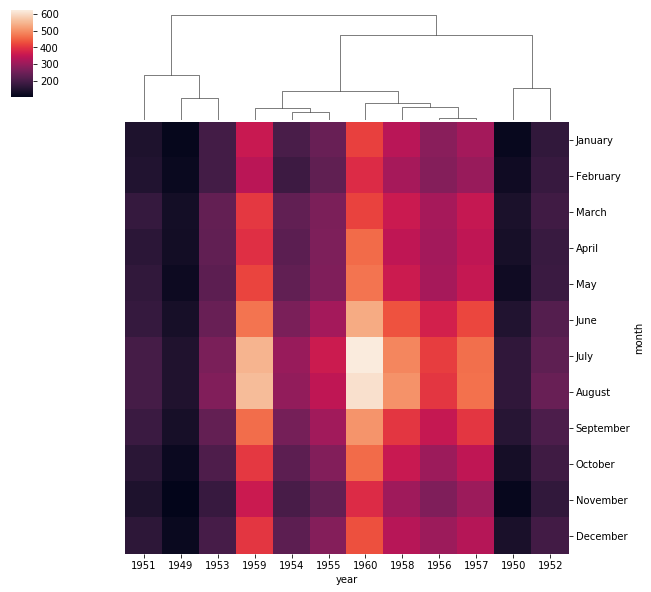

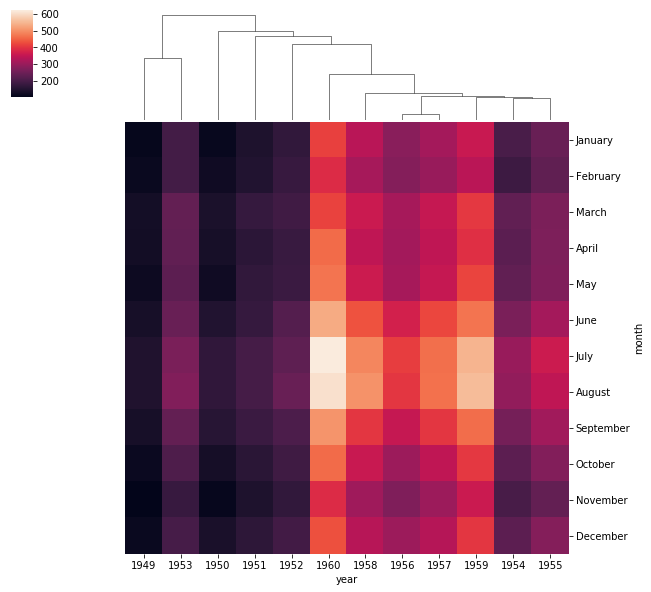

In [25]:
ax = sns.clustermap(df_pivoted, col_cluster=False, metric='correlation', method='average')
ax = sns.clustermap(df_pivoted, row_cluster=False, metric='correlation', method='complete')
ax = sns.clustermap(df_pivoted, row_cluster=False, metric='correlation', method='single')

### Assessment Questions 

The y-axis on the histogram stands for:
- count of the features that take the value on x-axis
- count of the datapoints that take the feature value on x-axis
- probability that a feature takes the value on x-axis
- probability that there is a datapoint takes the feature value on x-axis

answer: b

Each point in a scatterplot represents:
- a feature
- a datapoint
- both of the above
- neither of the above

answer: b

Heatmaps help to represent the relationship of a continuous numerical feature with:
- two features that are either categorical or discrete numerical
- two features that are necessarily categorical
- two features that are necessarily discrete numerical
- two features that are necessarily continuous numerical

answer: a

A line plot is useful to study the relationship between:
- a continuous numerical feature and a discrete numerical feature
- a continuous numerical feature and a categorical feature
- two continuous numerical features
- two discrete numerical features

answer: a


### Topic summary
In this section, we studied plots that present the global patterns of one or more features in a dataset. Most data scientists prefer to see such plots because they give an idea of the entire spectrum of values taken by the features of interest. Plots depicting global patterns are also useful because they make it easier to spot anomalies in the data. The following plots were specifically highlighted in the section:
- histograms: useful to examine the range of values taken by individual features and the frequency with which they appear
- scatterplots: useful to observe the relationship between two potentially related features in the dataset
- hexbin plots and contour plots: a good alternative for scatterplots when data is too dense in some parts of feature space
- line plots: useful to indicate the relationship between a discrete numerical feature (on the x-axis) and continuous numerical feature (on the y-axis)
- heatmaps: useful to examine the relationship between a continuous numerical feature of interest with two other features that are either categorical or discrete numerical.

## Creating plots that present summary statistics of your data

It's now time for a switch to our next section. When the datasets are huge, it is sometimes useful to look at the summary statistics of a range of different features and get a preliminary idea of the dataset. On the other hand, when the dataset is too small, plots presenting summary statistics may actually be misleading because summary statistics only assume meaning when the dataset is big enough to draw statistical conclusions.

### Histograms revisited

Let’s revisit our example of plotting a histogram. Although histograms show the distribution of a given feature in the data, we can make the plot a little more informative by showing some summary statistics in the same plot. Let’s revisit the the mpg dataset and draw such a histogram.

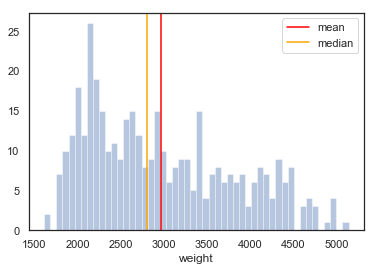

In [29]:
# histogram using seaborn
import numpy as np

ax = sns.distplot(mpg_df.weight, bins=50, kde=False)
plt.axvline(x=np.mean(mpg_df.weight), color='red', label='mean')
plt.axvline(x=np.median(mpg_df.weight), color='orange', label='median')
plt.legend(loc='upper right')

### Box plots

Now, suppose we want to know the summary statistics of the mpg feature (mileage) classified by another feature -- the number of cylinders. A popular way to show such information is to use boxplots. This is very easy to do with the seaborn library:

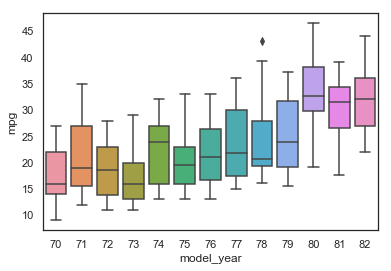

In [37]:
# box plot: mpg(mileage) vs model_year
sns.boxplot(x='model_year', y='mpg', data=mpg_df)

<div class="alert-info">
    <b>Interpretation of a boxplot</b>: The box boundaries indicate the interquartile range -- the upper boundary marks the 25% quartile and the lower boundary marks the 75% quartile. The horizontal line inside the box indicates the median. Any solo points outside of the whiskers mark outliers while the whiskers themselves show the minimum and maximum values that are not outliers.
</div>

Apparently, mileage improved substantially in the 80's as compare to the 70's. Let's add another feature to our mpg dataframe which denotes whether the car was manufactured in the 70's or 80's.

In [49]:
# creating a new feature 'model_decade'
mpg_df['model_decade'] = np.floor(mpg_df.model_year/10)*10
mpg_df['model_decade'] = mpg_df['model_decade'].astype(int)
mpg_df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,model_decade
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,80
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,80
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,80
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,80
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10,80


Now, let's redraw our boxplot to look at mileage distribution for the two decades:

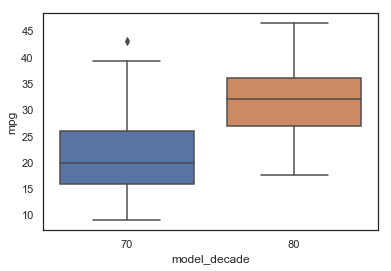

In [50]:
# a boxplot with multiple classes
sns.boxplot(x='model_decade', y='mpg', data=mpg_df)

But wait, there is more that can be done with boxplots. We can also add another feature, say region of origin, and see how that affects the relationship between mileage and manufacturing time, the two features we have been considering so far. The following code can do this for us.

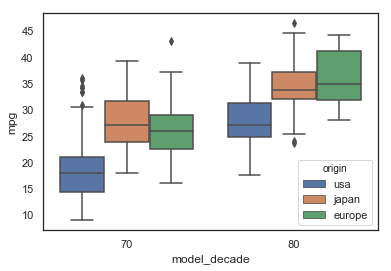

In [51]:
# boxplot: mpg (mileage) vs model_decade
sns.boxplot(x='model_decade', y='mpg', data=mpg_df, hue='origin')

So, according to the mpg dataset, in the 70's and early 80's, Europe and Japan produced cars with better mileage than did the USA. Interesting!

### Violin plots

Boxplots are an excellent way to examine the relationship of summary statistics of a numerical feature in relation to other categorical features. But what if we could get a hint regarding the entire distribution of a specific numerical feature classified by other categorical features? Violin plots are designed to do exactly this. The code below shows a concrete example.

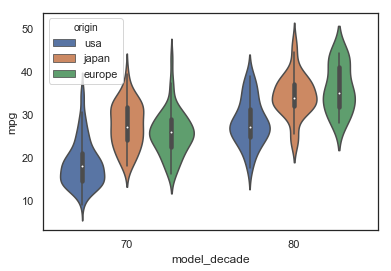

In [52]:
# code for violinplots
sns.violinplot(x='model_decade', y='mpg', data=mpg_df, hue='origin')

<div class="alert-info">
<b>Interpretation of a violinplot</b>: The fatter sections of the plot indicate ranges of higher probability of the y-axis feature, the thinner sections indicate areas of lower probability. The thick solid line at the center of each distribution represents the interquartile range -- the two ends are the 25% and 75% quantile and the dot is the median. The thinner solid line shows 1.5 times the interquartile range.
</div>

### Assessment questions

The three lines in the 'box' of a boxplot indicate:
- mean, end of first quartile, and end of third quartile
- mean, beginning of first quartile, and end of third quartile
- median, beginning of first quartile, and end of third quartile
- median, end of first quartile, and end of third quartile

answer: d

The piece of information that is available in a violinplot but not in a boxplot is:
- count distribution of the feature over all datapoints in consideration
- median and quartile ranges of the feature over all datapoints in consideration
- probability distribution of the feature over all datapoints in consideration
- outliers among the datapoints in consideration

answer: c

### Topic summary
In this section, we studied some plots that present summary statistics of various features in the dataset. These plots are especially useful representations of data when the datasets are huge and it is computationally expensive and time-intensive to generate plots that depict global patterns in the data. We learnt how to add mean and median markers in the histogram of a given feature in the dataset. We also studied box plots and violin plots -- while box plots depict the summary statistics alone (feature median and quartiles), violin plots also show the probability distribution of the feature across different value ranges.

## Chapter-level Activity

We’ll continue to work with the World University Rankings dataset from Kaggle. As a visualization specialist, your task is to create two plots: (1) a plot using an appropriate visualization technique that best presents any global pattern in the data, and (2) a plot using an appropriate visualization technique that best presents a summary statistic of your choice in the data. This exercise is broadly defined on purpose so that the reader is encouraged to use their creativity and skills in bringing out important insights from data.

## Chapter-level Summary

The choice of the most appropriate visualization(s) depends on four key elements:
- the nature of features in a dataset: categorical/discrete numerical/continuous numerical
- the size of the dataset: small/medium large dataset
- density of the datapoints in chosen feature space: whether too many or too little datapoints assume certain feature values
- the context of the visualization: the source of the dataset and frequently used visualizations for the given application

For the purpose of explain concepts clearly and defining certain general guidelines, we classified visualizations into two categories:
- plots representing the global patterns of the chosen features (e.g. histograms, scatterplots, hexbin plots, contour plots, line plots, heatmaps) 
- plots representing the summary statistics of the features (box plots, violin plots) 

We do not imply that a single-best visualization must be determined right away for any given application. For most datasets, the best visualizations will likely emerge from testing different kinds of plots and carefully examining the insights derived from each of them. This chapter provided the necessary resources to understand the interpretation and usage of various popular as well as less-widely employed informative visualization types.


## Chapter-level Quiz

When is it useful to generate a plot presenting summary statistics of features rather than global patterns?
- when the dataset is very small
- when the dataset is very huge
- when the dataset is medium-sized
- it is always useful independent of the size of the dataset

answer: b

State true or false: There must exist a single-best visualization for a given dataset and application:

answer: False

What are good visualization types to present the relationship between two continuous numerical features with many datapoints falling in specific regions of their feature space? (multiple options may be correct):
- contour plot
- hexbin plot
- scatter plot
- line plot

answer: a and b

A histogram for a specific feature in a dataset is a useful plot for which of the following:
- to spot outliers
- to examine the statistical distribution of an individual feature
- to know which values are taken most frequently by the given feature
- all of the above

answer: d
